In [2]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import os

meta = pd.read_csv("../data/SAMPLE_INFO.txt.gz", sep="\t")

In [11]:
meta['file_name'] = meta['file_path'].apply(lambda x: os.path.basename(x))
meta = meta.drop_duplicates(subset='file_name', keep='first').set_index('filename')

In [19]:
os.chdir('/data/cephfs-1/home/users/maje12_c/work/guenther_rms/stjude/')

In [20]:
sample_files = {}
for row in meta[["file_id", "file_path"]].drop_duplicates().itertuples():
    #print(row)
    fname = os.path.basename(row.file_path) + '.gz'
    sample_files[row.Index] = fname
    if not os.access(fname, os.R_OK):
        print(f"need to download {row.file_id} -> {fname}")
        #os.system(f"dx download {row.file_id}")
    else:
        print(f"file exists: {fname}")

file exists: SJACT030424_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJACT030437_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJACT030487_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJALCL031066_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030210_D2.RNA-Seq.feature-counts.txt.gz
file exists: SJACT030812_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030416_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030430_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030601_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030612_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030683_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030440_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030592_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030361_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030464_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030454_D1.RNA-Seq.feature-counts.txt.gz
file exists: SJAML030560_D1.RNA-Seq.feature-counts.txt.gz
file exists: 

In [21]:
data = []
for sample, fname in sample_files.items():
    data.append(pd.read_csv(fname, sep='\t', names=['gene', sample]).set_index('gene'))
    print(f"loaded {len(data)} {fname}")


loaded 1 SJACT030424_D1.RNA-Seq.feature-counts.txt
loaded 2 SJACT030437_D1.RNA-Seq.feature-counts.txt
loaded 3 SJACT030487_D1.RNA-Seq.feature-counts.txt
loaded 4 SJALCL031066_D1.RNA-Seq.feature-counts.txt
loaded 5 SJAML030210_D2.RNA-Seq.feature-counts.txt
loaded 6 SJACT030812_D1.RNA-Seq.feature-counts.txt
loaded 7 SJAML030416_D1.RNA-Seq.feature-counts.txt
loaded 8 SJAML030430_D1.RNA-Seq.feature-counts.txt
loaded 9 SJAML030601_D1.RNA-Seq.feature-counts.txt
loaded 10 SJAML030612_D1.RNA-Seq.feature-counts.txt
loaded 11 SJAML030683_D1.RNA-Seq.feature-counts.txt
loaded 12 SJAML030440_D1.RNA-Seq.feature-counts.txt
loaded 13 SJAML030592_D1.RNA-Seq.feature-counts.txt
loaded 14 SJAML030361_D1.RNA-Seq.feature-counts.txt
loaded 15 SJAML030464_D1.RNA-Seq.feature-counts.txt
loaded 16 SJAML030454_D1.RNA-Seq.feature-counts.txt
loaded 17 SJAML030560_D1.RNA-Seq.feature-counts.txt
loaded 18 SJAML030547_D1.RNA-Seq.feature-counts.txt
loaded 19 SJAML030459_D1.RNA-Seq.feature-counts.txt
loaded 20 SJAML03047

In [23]:
df = pd.concat(data, axis=1)

In [24]:
df.head()

,SJACT030424_D1,SJACT030437_D1,SJACT030487_D1,SJALCL031066_D1,SJAML030210_D2,SJACT030812_D1,SJAML030416_D1,SJAML030430_D1,SJAML030601_D1,SJAML030612_D1,...,SJAML007124_D1,SJAML074191_D1,SJAML074192_D1,SJAML074193_D1,SJAML074194_D1,SJAML074195_D1,SJAML074196_D1,SJAML074197_D2,SJMLL001_D,SJMLL002_D
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,61,24,1,6,0,1,19,9,19,26,...,55,61,51,56,7,20,91,8,80,179
A1BG-AS1,101,249,31,91,6,13,232,58,55,177,...,227,495,366,289,109,131,535,21,732,334
A1CF,212,0,0,0,10,0,0,0,3,1,...,0,3,0,0,0,0,0,83,3,0
A2M,3618,29688,3033,1713,1650,7528,68,18,138,175,...,10,101,127,3,99,202,0,1483,48,23
A2M-AS1,119,129,149,91,24,218,192,22,256,103,...,4,647,244,13,85,5,78,24,60,11


In [32]:
df.to_csv('stjude_count_matrix.tsv.gz', sep='\t')


In [20]:
df = pd.read_csv('stjude_count_matrix.tsv.gz', sep='\t').set_index('gene')

## Load our own RNA-seq data

In [21]:
#ec = pd.read_csv("/home/marjens/cubi_home/work/guenther_rms/results/length_corrected.counts.csv", sep='\t').set_index('gene')
ec = pd.read_csv("/home/marjens/cubi_home/work/guenther_rms/for_marco/RMS_read_counts.csv.gz", sep='\t').set_index('gene')

In [22]:
ec

,IC35.r1,IC35.r2,X16.r1,X16.r2,IC104.r1,IC104.r2,BE14.r1,BE14.r2,R410.r1,R410.r2,IC29.r1,IC29.r2,BE13.r1,BE13.r2,X1.r1,X1.r2,ZH3.r1,ZH3.r2,Be10.r1,Be10.r2
gene,,,,,,,,,,,,,,,,,,,,
DDX11L1,0,0,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0
WASH7P,100,83,82,94,86,69,128,138,63,67,142,126,96,151,103,84,148,148,96,105
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OR4G4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,23061,24249,34813,28265,40781,53701,39398,39379,17686,22390,35828,35302,23139,29240,33130,33914,30496,29335,28493,29702
MT-TE,115,160,196,151,227,530,363,397,58,83,210,166,151,146,591,458,177,153,339,209
MT-CYB,60967,74060,88714,78380,185368,126173,134356,149008,82047,114747,134526,136181,122437,158402,78045,82260,111963,112423,104292,120803


In [23]:
df

,SJACT030424_D1,SJACT030437_D1,SJACT030487_D1,SJALCL031066_D1,SJAML030210_D2,SJACT030812_D1,SJAML030416_D1,SJAML030430_D1,SJAML030601_D1,SJAML030612_D1,...,SJAML007124_D1,SJAML074191_D1,SJAML074192_D1,SJAML074193_D1,SJAML074194_D1,SJAML074195_D1,SJAML074196_D1,SJAML074197_D2,SJMLL001_D,SJMLL002_D
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,61,24,1,6,0,1,19,9,19,26,...,55,61,51,56,7,20,91,8,80,179
A1BG-AS1,101,249,31,91,6,13,232,58,55,177,...,227,495,366,289,109,131,535,21,732,334
A1CF,212,0,0,0,10,0,0,0,3,1,...,0,3,0,0,0,0,0,83,3,0
A2M,3618,29688,3033,1713,1650,7528,68,18,138,175,...,10,101,127,3,99,202,0,1483,48,23
A2M-AS1,119,129,149,91,24,218,192,22,256,103,...,4,647,244,13,85,5,78,24,60,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
__no_feature,117437699,33112204,25828240,11134565,6968508,27922870,21869145,17690955,23999571,53583169,...,40342858,31821742,25116818,21935626,20711315,30102386,37251090,41253042,70638683,23215487
__ambiguous,579021,2284705,1529835,1131378,8086196,3299238,5460481,2074964,4142913,3806144,...,7057651,5537865,9978398,9876318,10461943,10743837,7964869,1435214,12150326,489719
__too_low_aQual,1318,0,1,264,1839,455,0,264,281,5,...,0,0,0,0,0,0,0,0,0,0


In [24]:
ad_sj = sc.AnnData(df.T) # st Jude data
ad_sj.var_names_make_unique()


In [25]:
ad_ec = sc.AnnData(ec.T) # EpiCycle data
ad_ec.var_names_make_unique()
ad_ec.obs['source'] = 'epicycle'

/home/marjens/micromamba/envs/jup/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/marjens/micromamba/envs/jup/lib/python3.12/site-packages/anndata/utils.py:261: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(


In [26]:
common = sorted(set(ad_sj.var_names.to_list()) & set(ad_ec.var_names.to_list()))

In [27]:
ad_sj.obs['source'] = 'stjude'


In [30]:
meta.head()

,file_path,file_id,subject_name,sample_type,sequencing_type,file_type,description,file_size,sj_dataset_accessions,sj_embargo_date,...,sj_ega_accessions,sj_access_unit,sj_diseases,sj_datasets,sj_pipeline_name,sj_pipeline_version,attr_tissue_preservative,attr_lab_strandedness,sj_disease_hierarchy_code,sj_disease_hierarchy_name
sample_name,,,,,,,,,,,,,,,,,,,,,
SJACT030424_D1,/FEATURE_COUNTS/SJACT030424_D1.RNA-Seq.feature...,file-FqP7v5896ZJyKg9jPxg209V9,SJ030424,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,705774,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030437_D1,/FEATURE_COUNTS/SJACT030437_D1.RNA-Seq.feature...,file-FqP7y8Q96ZJxzpbqBkxPFzBx,SJ030437,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,682926,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJACT030487_D1,/FEATURE_COUNTS/SJACT030487_D1.RNA-Seq.feature...,file-FqP7yB096ZJxzpbqBkxPFzBz,SJ030487,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,678042,SJC-DS-1007,Mar-01-2020,...,-,UnrestrictedData,ACC,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,FFPE,Stranded-Reverse,ST|ADRN|ACC,Solid Tumor|Adrenal Gland|Adrenocortical Carci...
SJALCL031066_D1,/FEATURE_COUNTS/SJALCL031066_D1.RNA-Seq.featur...,file-FqP7yGj96ZJXzXGx8fzKPZFP,SJ031066,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,669738,SJC-DS-1007,Apr-01-2020,...,-,UnrestrictedData,ALCL,Real-time Clinical Genomics (RTCG),RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|LYMPH|NHL|ALCL,Hematologic Malignancy|Lymphoid Neoplasm|Non-H...
SJAML030210_D2,/FEATURE_COUNTS/SJAML030210_D2.RNA-Seq.feature...,file-FqP7yK896ZJyKg9jPxg209kK,SJ030210,Diagnosis,RNA-Seq,FEATURE_COUNTS,-,668933,SJC-DS-1007;SJC-DS-1015,Apr-01-2020,...,-,UnrestrictedData,AMLKMT2A,Real-time Clinical Genomics (RTCG);Genomics an...,RNA-Seq Standard,2.0.0,Fresh/Frozen,Stranded-Reverse,HM|MYEL|AML|AMLKMT2A,Hematologic Malignancy|Myeloid Neoplasm|Acute ...


In [31]:
# copy st Jude metadata columns
for c in ['sample_type', 'sj_diseases', 'sj_disease_hierarchy_code', 'sj_disease_hierarchy_name']:
    # St Jude data contain some duplicate entries. Need to get rid of them...
    m = meta.loc[ad_sj.obs_names, c].reset_index().drop_duplicates().set_index('index')
    ad_sj.obs[c] = m

In [32]:
ad_sj.obs['RMS_type'] = ad_sj.obs['sj_diseases'].apply(lambda x: x if 'RMS' in x else 'non-RMS')

In [33]:
ad_sj.obs['RMS_type'].drop_duplicates()

SJACT030424_D1    non-RMS
SJRHB030480_D1       ARMS
SJRHB030681_D1       ERMS
SJRHB030451_D1      BERMS
SJRHB030411_D1     SCSRMS
SJRHB030646_D1     RMSNOS
SJRHB030944_D1      SCRMS
Name: RMS_type, dtype: object

In [34]:
ad_sj.obs['tissue'] = ad_sj.obs['sj_disease_hierarchy_code'].apply(lambda x: x.split('|')[0])

In [35]:
ad_sj[ad_sj.obs['tissue'] == 'ST'].obs['RMS_type'].value_counts()

RMS_type
non-RMS    1049
ERMS         68
ARMS         49
RMSNOS       30
SCRMS         6
BERMS         5
SCSRMS        4
Name: count, dtype: int64

In [36]:
ad_ec.obs['sample_type'] = 'pdx'
ad_ec.obs['RMS_type'] = 'this_study'
ad_ec.obs['tissue'] = 'ST'

In [37]:
# Now we want to correlate the log expression between every of our (length-corrected) samples and all sj samples

In [38]:
ad = sc.concat([ad_sj[ad_sj.obs['tissue'] == 'ST', common], ad_ec[:, common]])

In [39]:
ad.layers['raw_counts'] = ad.X.copy()

In [40]:
sc.pp.normalize_total(ad, target_sum=1E6)

In [41]:
ad.layers['normed'] = ad.X.copy()

In [42]:
sc.pp.log1p(ad)
ad.layers['log1p'] = ad.X.copy()

In [43]:
sc.pp.highly_variable_genes(ad, n_top_genes=3000, flavor='cell_ranger')

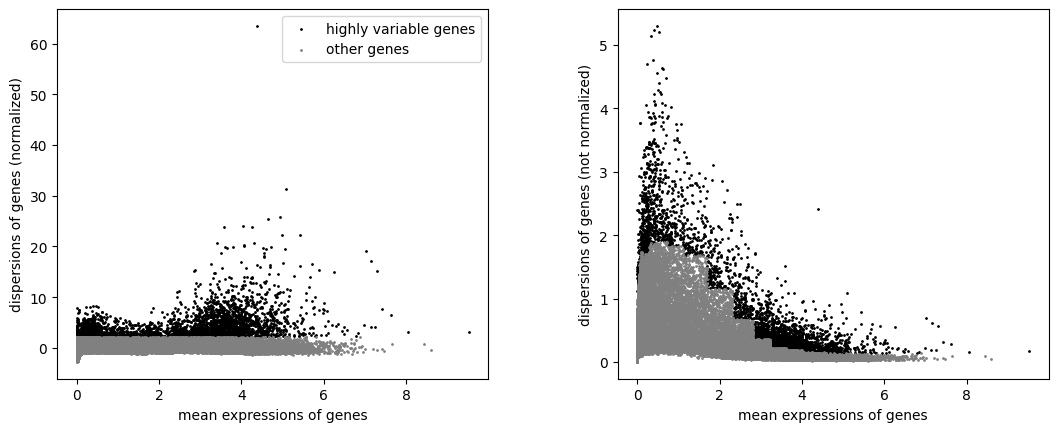

In [44]:
sc.pl.highly_variable_genes(ad)

In [45]:
sc.pp.scale(ad)
ad.layers['scaled'] = ad.X.copy()

In [ ]:
ad.write_h5ad('st_jude_and_epicycle_adata.h5ad')

In [46]:
ad = sc.read_h5ad('st_jude_and_epicycle_adata.h5ad')

In [47]:
sc.pp.pca(ad)

In [48]:
sc.pp.neighbors(ad)

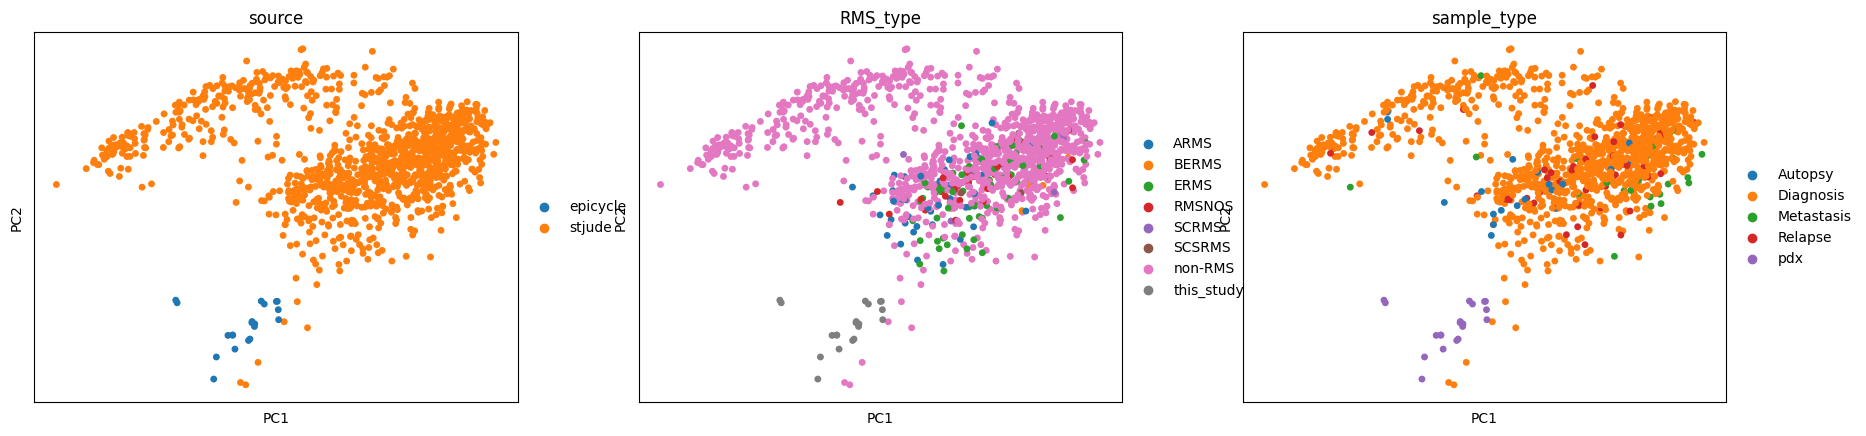

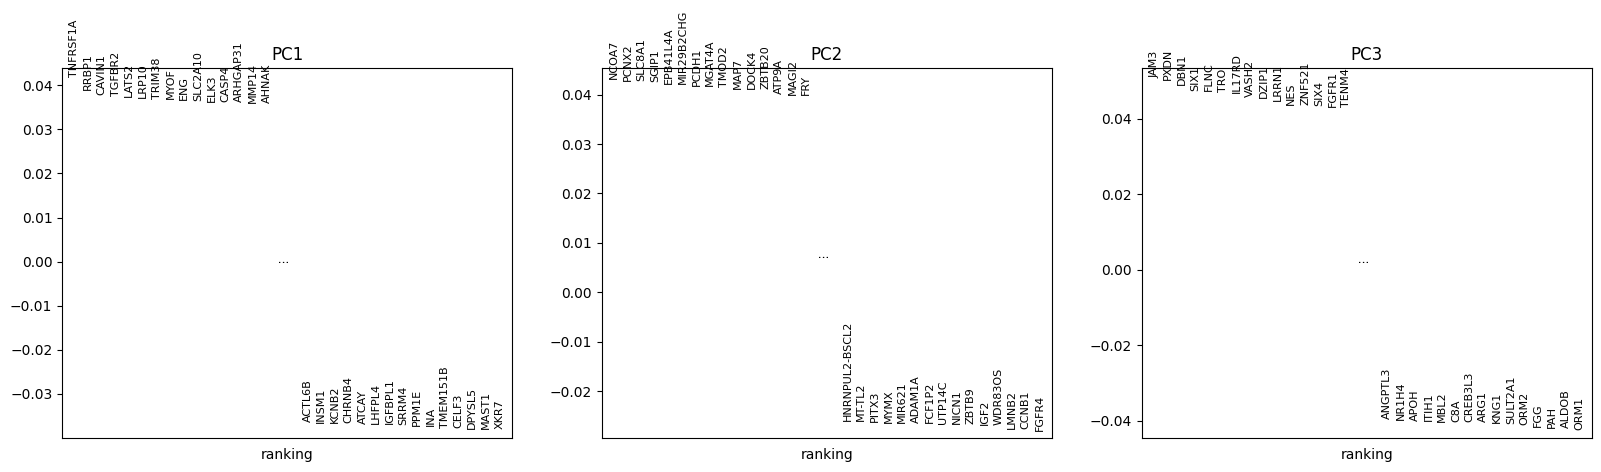

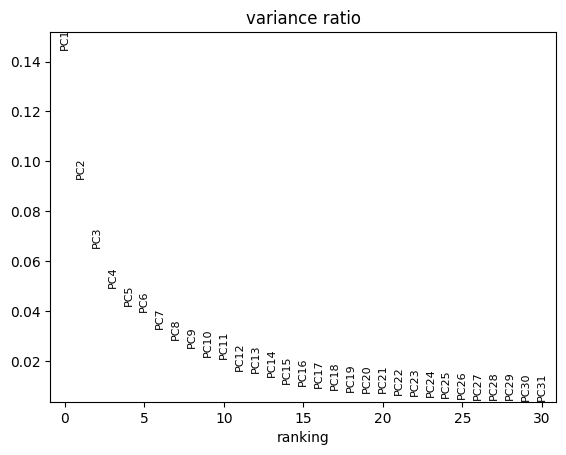

In [49]:
sc.pl.pca_overview(ad, color=['source', 'RMS_type', 'sample_type'])

In [50]:
sc.tl.umap(ad)

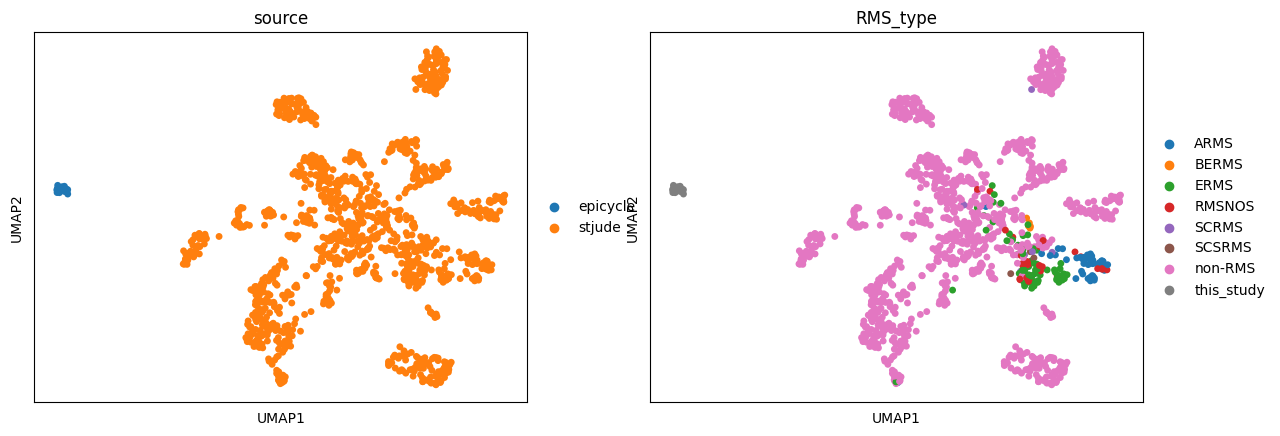

In [51]:
sc.pl.umap(ad, color=['source', 'RMS_type'])

In [52]:
DF = ad.to_df()

In [53]:
import numpy as np
from scipy.stats import pearsonr

corr = {
    'query': [],
    'sample_name': [],
    'corr': [],
}
for query in ad_ec.obs_names:
    print(query)
    for target in ad_sj[ad_sj.obs['tissue'] == 'ST'].obs_names:
        corr['corr'].append(pearsonr(DF.loc[query, ad.var.highly_variable].values, DF.loc[target, ad.var.highly_variable].values).statistic)
        corr['query'].append(query)
        corr['sample_name'].append(target)
    

IC35.r1
IC35.r2
X16.r1
X16.r2
IC104.r1
IC104.r2
BE14.r1
BE14.r2
R410.r1
R410.r2
IC29.r1
IC29.r2
BE13.r1
BE13.r2
X1.r1
X1.r2
ZH3.r1
ZH3.r2
Be10.r1
Be10.r2


In [54]:
C = pd.DataFrame(corr)

In [55]:
C['RMS_type'] = ad_sj.obs.loc[C['sample_name'], 'RMS_type'].to_list()
# C['RMS_type'] = C['sample_name'].apply(lambda x : )

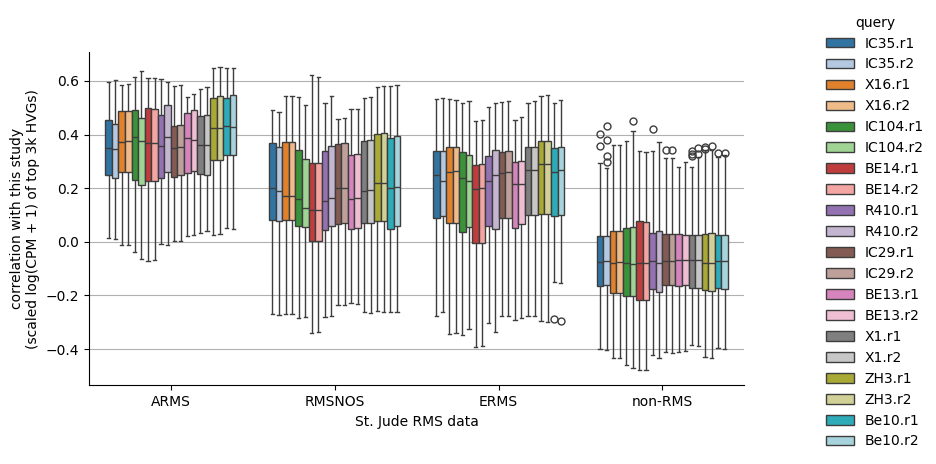

In [74]:
g = sns.catplot(data=C.sort_values('corr', ascending=False), x='RMS_type', y='corr', hue='query', hue_order=ad_ec.obs_names.to_list(), order=['ARMS', 'RMSNOS', 'ERMS', 'non-RMS'], dodge=True, kind='box', palette='tab20')
g.fig.set_size_inches(10, 4)
g.ax.grid(visible='both', axis='y')
g.ax.set_ylabel("correlation with this study\n(scaled log(CPM + 1) of top 3k HVGs)")
g.ax.set_xlabel("St. Jude RMS data")
g.savefig('correlation_plot.pdf')

In [57]:
sub = ad[ad.obs['RMS_type'] == 'ARMS', ad.var.highly_variable]

In [58]:
ctrl = sub.to_df().T.corr()

In [59]:
keep = np.triu(np.ones(ctrl.shape), 1).astype('bool').reshape(ctrl.size)
ctrl = ctrl.stack()[keep]

In [60]:
ctrl = ctrl.reset_index()

In [61]:
ctrl['label'] = "ARMS_vs_ARMS"
ctrl['label'] = pd.Categorical(ctrl['label'])

In [62]:
ctrl.columns

Index(['level_0', 'level_1', 0, 'label'], dtype='object')

In [63]:
ctrl

,level_0,level_1,0,label
0,SJRHB030480_D1,SJRHB030445_D1,0.686883,ARMS_vs_ARMS
1,SJRHB030480_D1,SJRHB030476_D1,0.673612,ARMS_vs_ARMS
2,SJRHB030480_D1,SJRHB030550_D1,0.710165,ARMS_vs_ARMS
3,SJRHB030480_D1,SJRHB030495_D1,0.635808,ARMS_vs_ARMS
4,SJRHB030480_D1,SJRHB030421_D1,0.521830,ARMS_vs_ARMS
...,...,...,...,...
1171,SJRHB030550_R1,SJRHB033907_D1,0.632370,ARMS_vs_ARMS
1172,SJRHB030550_R1,SJRHB034210_D1,0.681066,ARMS_vs_ARMS
1173,SJST033686_D1,SJRHB033907_D1,0.655433,ARMS_vs_ARMS
1174,SJST033686_D1,SJRHB034210_D1,0.504900,ARMS_vs_ARMS


In [64]:
ctrl['query'] = 'St. Jude vs St. Jude ARMS'
ctrl['sample_name'] = ctrl['level_1']
ctrl['corr'] = ctrl[0]
ctrl['RMS_type'] = 'ARMS_vs_ARMS_ctrl'

In [65]:
sub_ec = ad[ad.obs['source'] == 'epicycle', ad.var.highly_variable]

In [66]:
ctrl_ec = sub_ec.to_df().T.corr()

In [67]:
keep = np.triu(np.ones(ctrl_ec.shape), 1).astype('bool').reshape(ctrl_ec.size)
ctrl_ec = ctrl_ec.stack()[keep]

In [68]:
ctrl_ec = ctrl_ec.reset_index()

In [69]:
ctrl_ec['label'] = "epicycle_vs_epicycle"
ctrl_ec['label'] = pd.Categorical(ctrl_ec['label'])

In [70]:
ctrl_ec['query'] = 'epicycle vs epicycle ARMS'
ctrl_ec['sample_name'] = ctrl_ec['level_1']
ctrl_ec['corr'] = ctrl_ec[0]
ctrl_ec['RMS_type'] = ctrl_ec['label']

<AxesSubplot: xlabel='query', ylabel='corr'>

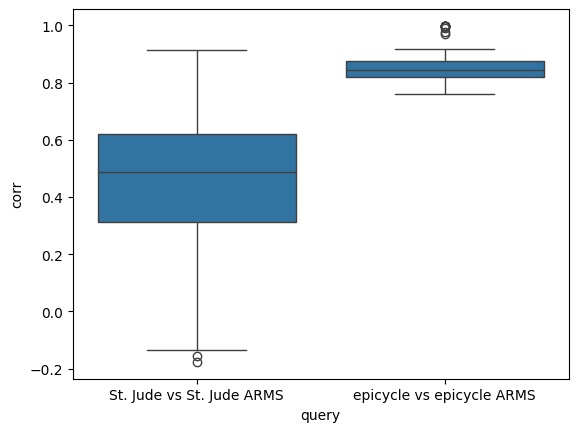

In [71]:
sns.boxplot(data=pd.concat([ctrl, ctrl_ec], ignore_index=True, axis=0), x='query', y='corr')

In [72]:
pd.concat([ctrl, ctrl_ec], ignore_index=True, axis=0)[['RMS_type', 'corr']].sort_values('corr', ascending=False)

,RMS_type,corr
1351,epicycle_vs_epicycle,0.997953
1275,epicycle_vs_epicycle,0.997870
1360,epicycle_vs_epicycle,0.997767
1213,epicycle_vs_epicycle,0.997551
1321,epicycle_vs_epicycle,0.997453
...,...,...
456,ARMS_vs_ARMS_ctrl,-0.133632
781,ARMS_vs_ARMS_ctrl,-0.134223
1052,ARMS_vs_ARMS_ctrl,-0.135257
1049,ARMS_vs_ARMS_ctrl,-0.155266
